# Tentativa de refazer a `aula0001.ipynb`
Data: 12/10/2020

# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style()
%matplotlib inline

# Abrindo o arquivo e criando um DataFrame a partir dele

In [48]:
file1 = "Electric_Production.csv"
df = pd.read_csv(file1)

In [49]:
# visualizando o dataframe
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [50]:
# analisando o dataframe
df.dtypes

DATE      object
Value    float64
dtype: object

Vemos acima que possuímos dois objetos: DATE e Value.
Se olharmos atentamente ao tipo da coluna `DATE`, vemos que é um `object`, i.e, `string`. Devemos substituir para `Datetime`.

In [51]:
# antes de mudar para datetime
df.DATE.head()

0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [52]:
pd.to_datetime(df.DATE, format = "%m-%d-%Y")

0     1985-01-01
1     1985-02-01
2     1985-03-01
3     1985-04-01
4     1985-05-01
         ...    
392   2017-09-01
393   2017-10-01
394   2017-11-01
395   2017-12-01
396   2018-01-01
Name: DATE, Length: 397, dtype: datetime64[ns]

In [53]:
df.index = pd.to_datetime(df.DATE, format = "%m-%d-%Y")

In [54]:
df.drop("DATE", inplace=True, axis=1)

In [55]:
df

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [56]:
df.dtypes

Value    float64
dtype: object

# Visualizando os dados acima.

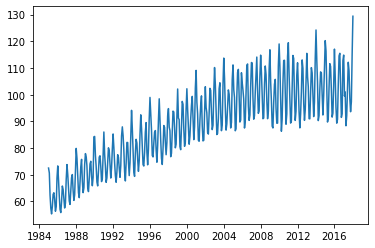

In [58]:
plt.plot(df.index, df.Value);

### Algumas informações retiradas do gráfico acima

Podemos perceber que o gráfico é crescente, pois os fundos e topos estão cada vez mais altos.
Porém, o gráfico não está facilmente lido. Para resolver isso, podemos fragmentá-lo com pequenos gráficos. Matematicamente, o tratamento deste gráfico pode ser dado com somas ou multiplicações.

### Limpando o gráfico

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.
A biblioteca `stats from statsmodels.tsa.seasonal import seasonal_decompose`.

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

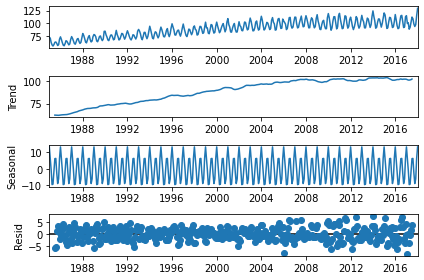

In [67]:
# a variavel result receberá a decomposição
result = seasonal_decompose(df)

# plotando a decomposição
result.plot();

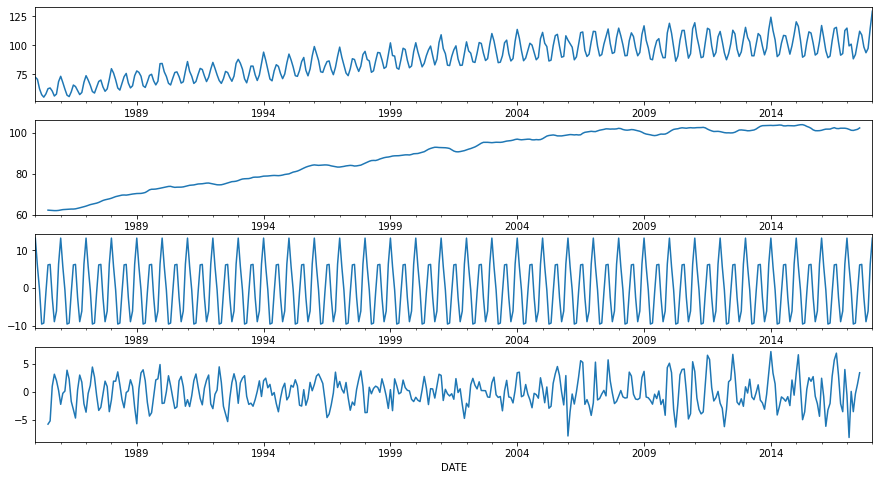

In [69]:
# plotando usando outra tecnica
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4);